In [1]:
#import pre_data as p
from yolo_model import hand_model
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import time as t
import os
print('fin import')

fin import


In [2]:
model = hand_model()

In [91]:
#load state
ep = 10000000 + 170
data = torch.load('saveV5/train0018_ep%d.pth'%ep, map_location=torch.device('cpu'))
model.load_state_dict(data['model_state_dict'])
loss = data['loss']
epoch = data['epoch']
time = data['time']

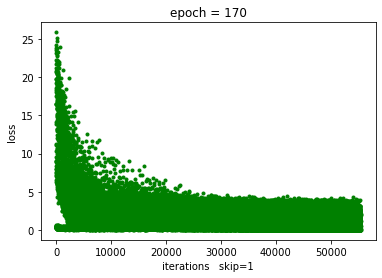

In [92]:
skip = 1
plt.plot(loss[::skip],'.g')
plt.title('epoch = %d'%(epoch))
#plt.title('epoch = %d     time = %d hr %d min'%(epoch,(time/60)//60, (time/60)%60))
ym=0.2e6
#plt.ylim([0, ym])
#plt.xlim([0, len(loss)/skip+100])
plt.xlabel('iterations   skip='+str(skip))
plt.ylabel('loss')
plt.show()

In [127]:
def highconf(output, thres=0.3):
    conf_map1 = output[:,:,4]
    conf_map2 = output[:,:,11]
    x1, y1 = torch.where(conf_map1>thres)
    x2, y2 = torch.where(conf_map2>thres)
    temp = []
    if len(x1) > 0:
        for i in range(len(x1)):
            temp.append(output[x1,y1,:7])
    if len(x2) > 0 :
        for i in range(len(x2)):
            temp.append(output[x2,y2,7:])
    ret = 'blank' if temp == [] else temp
    return ret
def pred_dat(arg, output):
    ans = []
    for i in range(len(arg)):
        if arg[i][2] == 4:
            out = output[arg[i][0],arg[i][1]].squeeze()
            ans.append(out[:7])
        if arg[i][2] == 11:
            out = output[arg[i][0],arg[i][1]].squeeze()
            ans.append(out[7:])
    return ans
def unpack_pred(pred,width,height):
    ans = []
    print(pred)
    for i in range(len(pred)):
        out = pred[i]
        print(out)
        x = out[0]*width
        y = out[1]*height
        w = out[2]*width
        h = out[3]*height
        x1 = x - w/2
        x2 = x + w/2
        y1 = y - w/2
        y2 = y + w/2
        conf = out[4]
        class1 = out[5]
        class2 = out[6]
        cla = 'class1' if class1 > class2 else 'class2'
        ans.append([x,y,x1,y1,x2,y2,cla])
    return ans
def plot(img, pred_):
    for i in range(len(pred_)):
        pred = pred_[i]
        img = img[(2,1,0),:,:].transpose(2,0)
        plt.imshow(img)
        cx,cy,x1,y1,x2,y2,cla = pred
        plt.plot(cx,cy,'ro')
        plt.plot(x1,y1,'go')
        plt.plot(x1,y2,'go')
        plt.plot(x2,y1,'go')
        plt.plot(x2,y2,'go')
        plt.show()

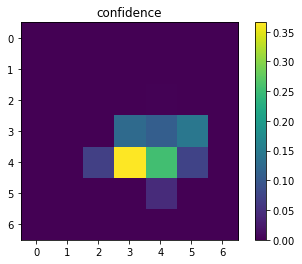

In [122]:
#ck training set
tr = [i for i in range(330)]
perm = torch.randperm(len(tr))

i = 2
name = int(tr[i])
namei = str(name).zfill(5)
img = torch.load('../data011/imgi640_torch/'+namei)/255
gt = torch.load('../data011/gt/'+namei)
im = img.unsqueeze(0)
with torch.no_grad():
    output = model(im)
plt.title('confidence')
plt.imshow(output[:,:,4])
plt.colorbar()
plt.show()

In [128]:
a = highconf(output)
a

[tensor([[0.6345, 0.5408, 0.2078, 0.3951, 0.3658, 0.5206, 0.2054]])]

In [141]:
def get_prob(classscore)
pci = torch.exp(test)/torch.exp(test).sum()
pci[0]

tensor(0.5498)

blank pred
[tensor([0.6400, 0.7350, 0.2122, 0.4653, 1.0000, 0.0000, 1.0000])]
tensor([0.6400, 0.7350, 0.2122, 0.4653, 1.0000, 0.0000, 1.0000])


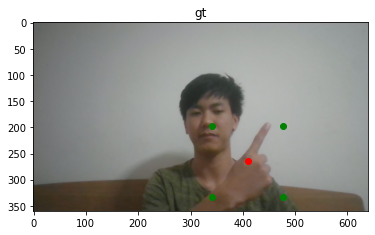

In [111]:
width = img.shape[1]
height = img.shape[2]

arg = highconf(output)
if arg != 'blank':
    pred = pred_dat(arg, output)
    pred_ = unpack_pred(pred,width,height)
    plt.title('pred')
    plot(img, pred_)
else: print('blank pred')
    
arggt = highconf(gt)
if arggt != 'blank':
    gtt = pred_dat(arggt, gt)
    gt_ = unpack_pred(gtt, width,height)
    plt.title('gt')
    plot(img, gt_)
else: print('blank gt')

In [82]:
gtt


[tensor([[0.7142, 0.5382, 0.1966, 0.3958, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.6491, 0.6169, 0.2435, 0.3449, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]),
 tensor([[0.7142, 0.5382, 0.1966, 0.3958, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.6491, 0.6169, 0.2435, 0.3449, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])]

C:\Users\Walter\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  del sys.path[0]


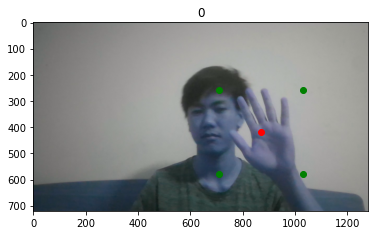

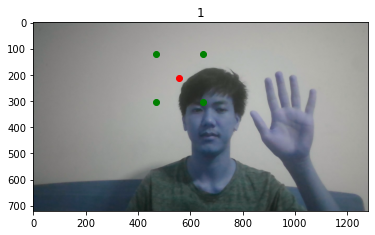

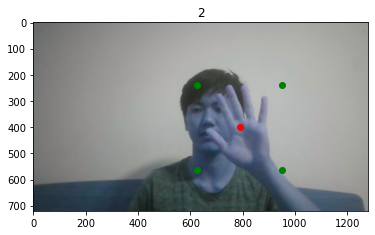

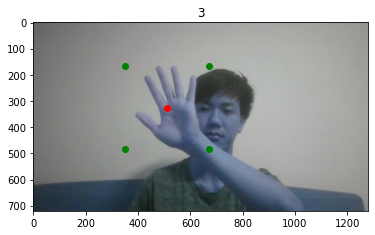

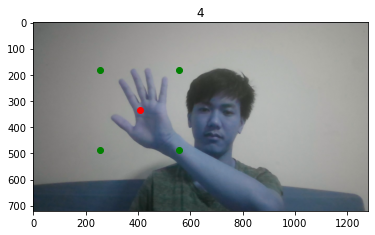

blank


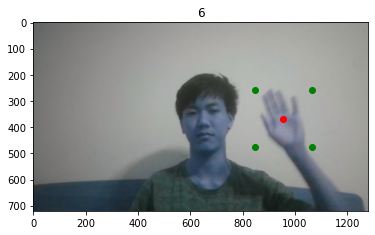

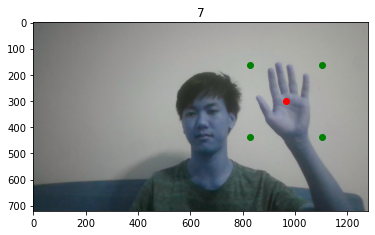

blank
blank
blank
blank
blank
blank


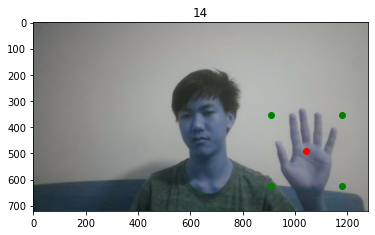

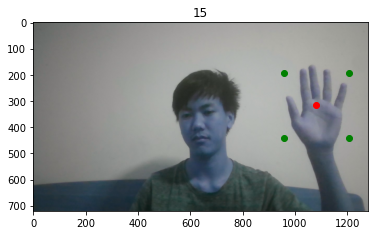

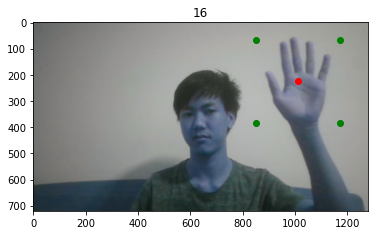

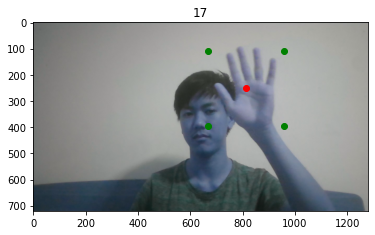

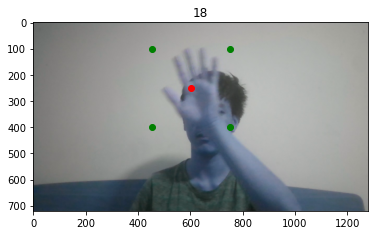

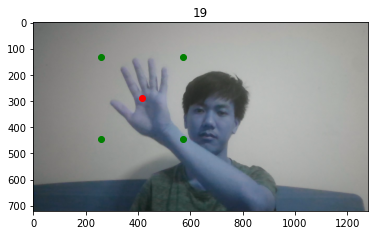

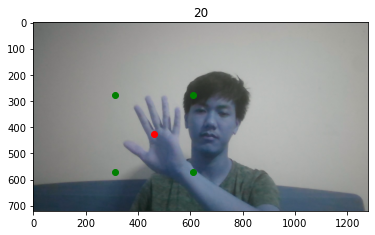

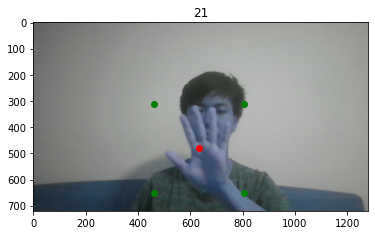

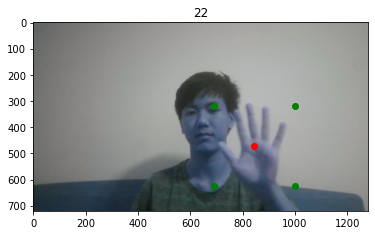

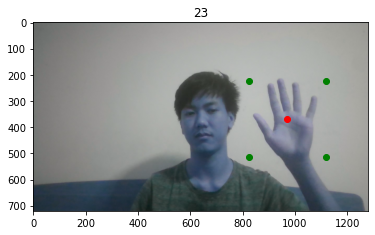

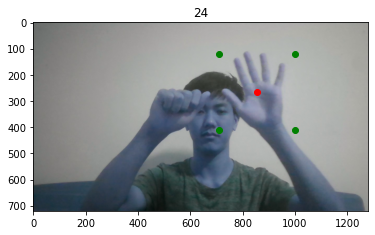

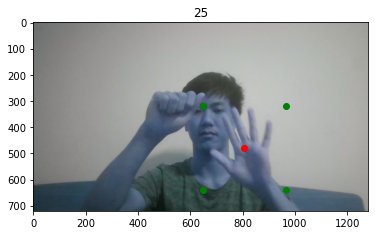

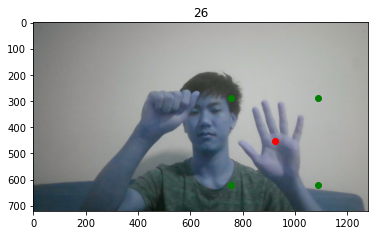

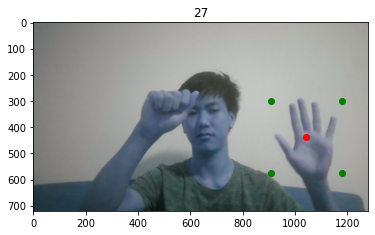

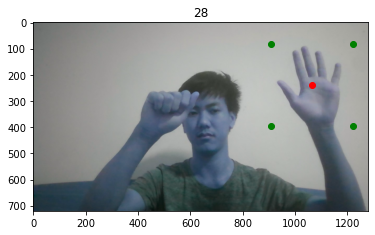

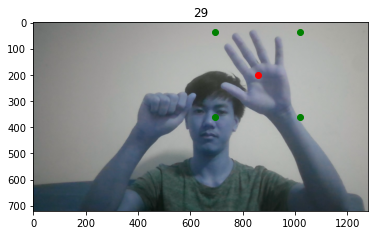

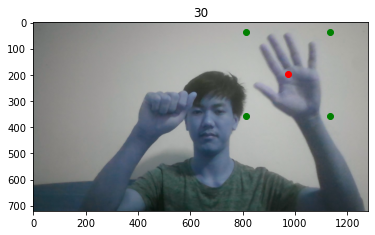

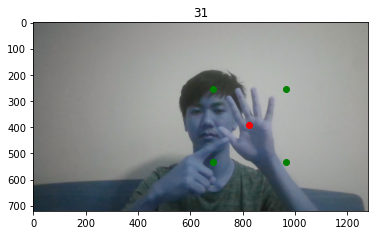

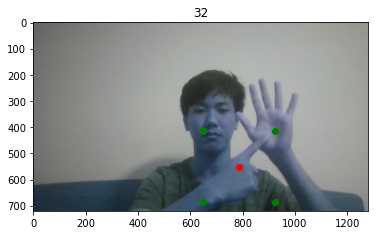

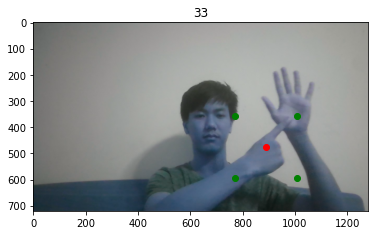

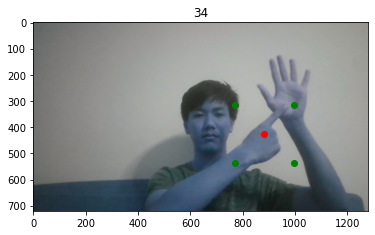

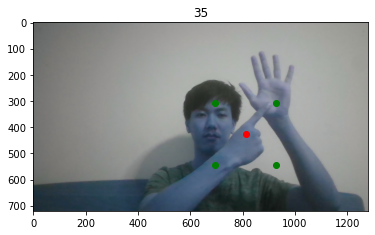

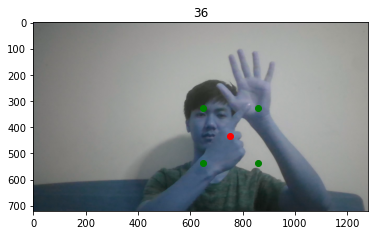

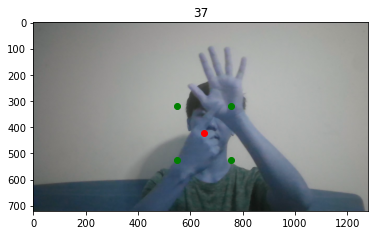

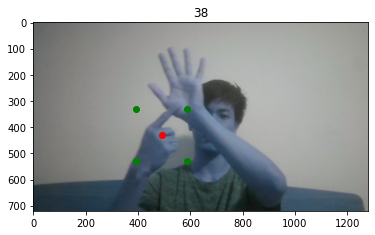

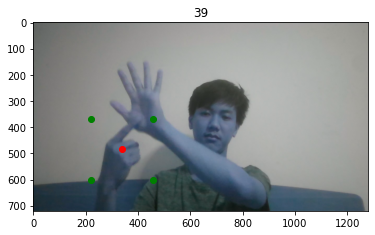

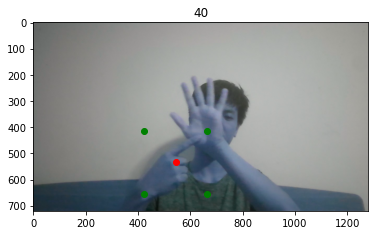

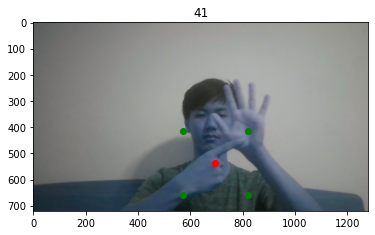

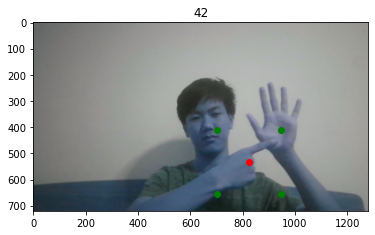

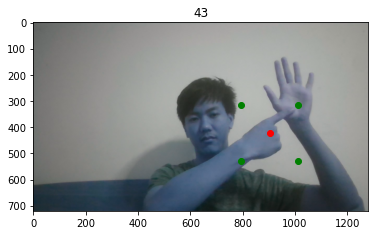

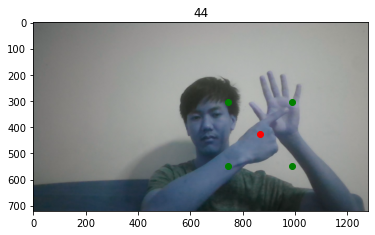

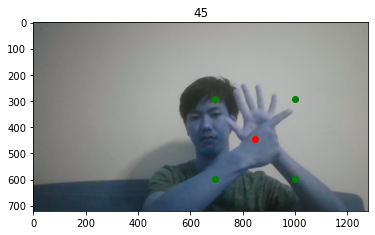

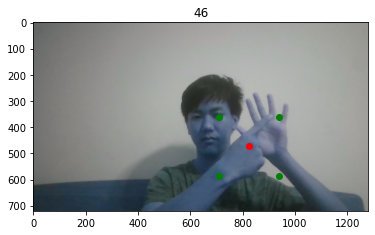

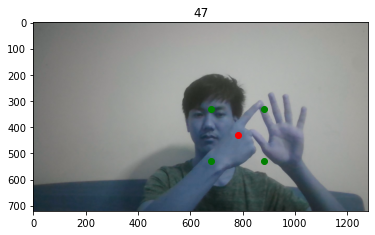

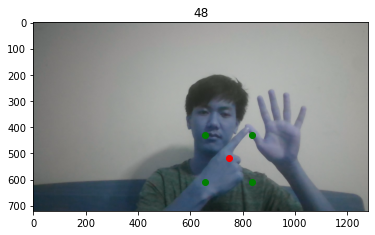

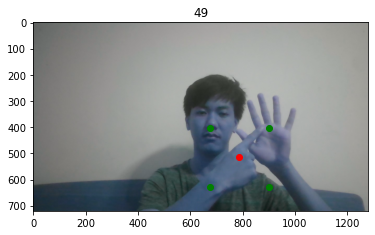

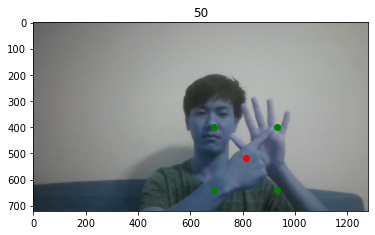

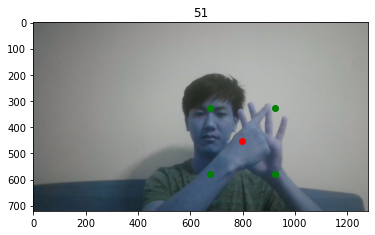

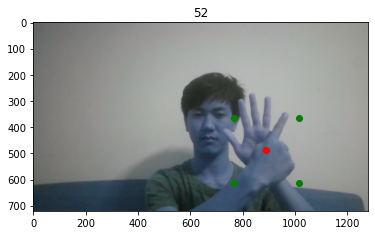

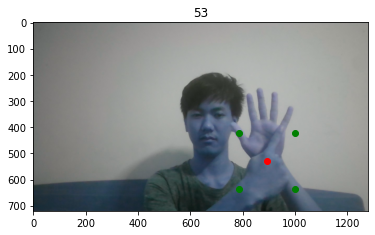

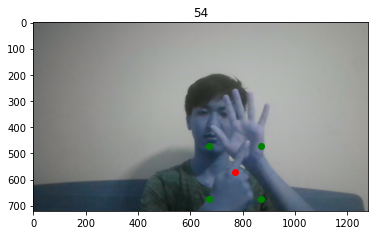

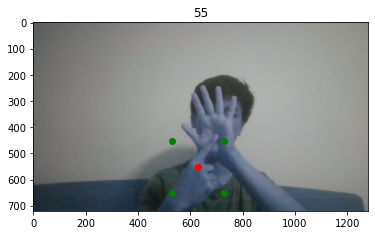

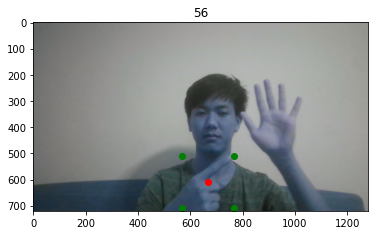

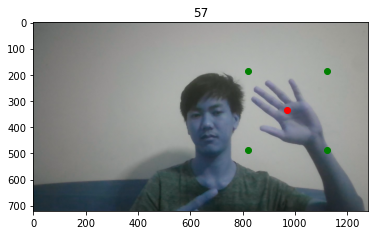

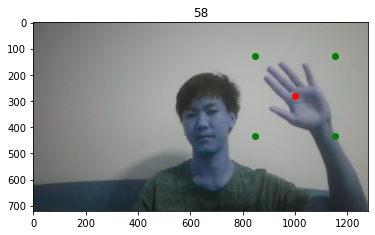

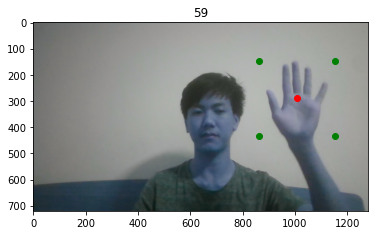

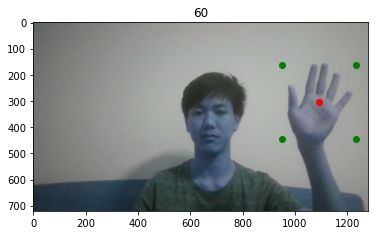

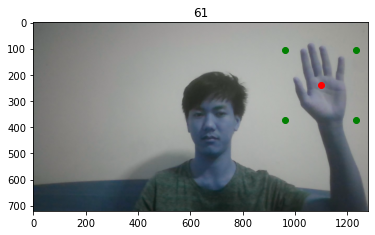

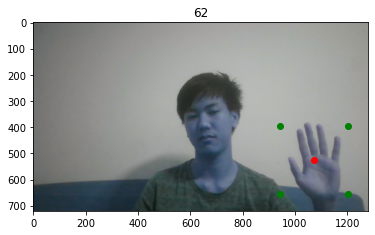

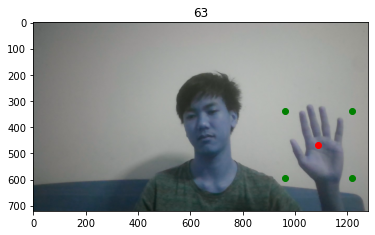

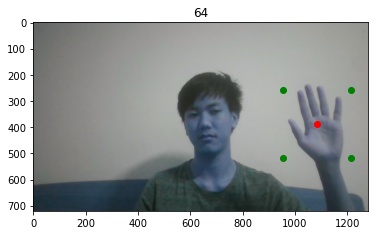

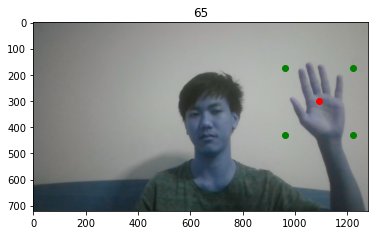

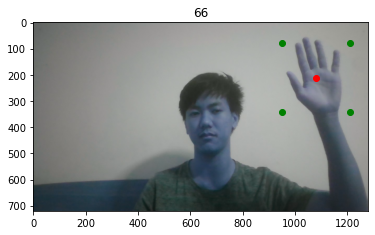

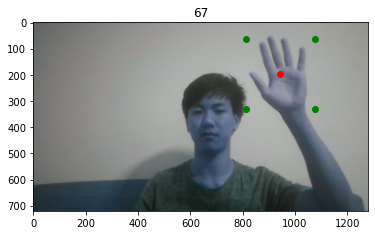

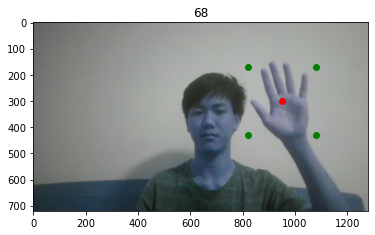

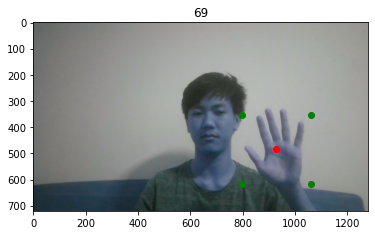

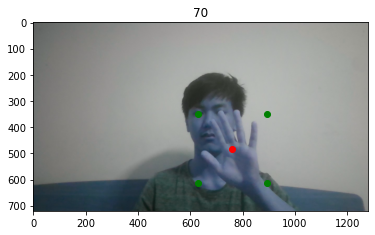

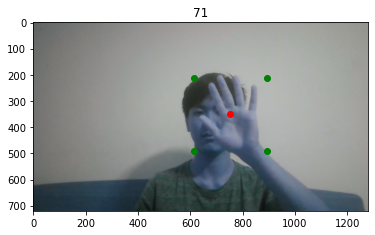

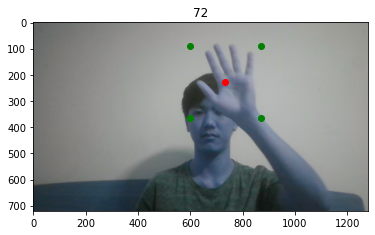

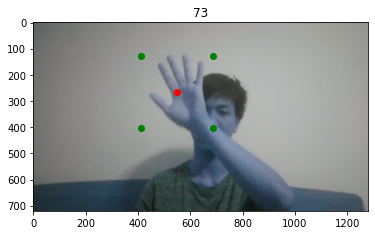

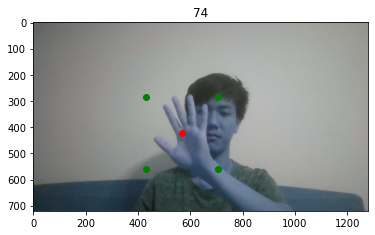

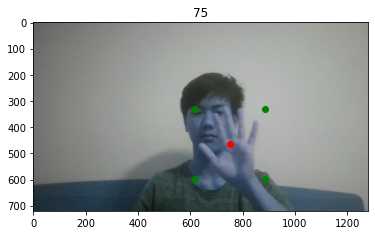

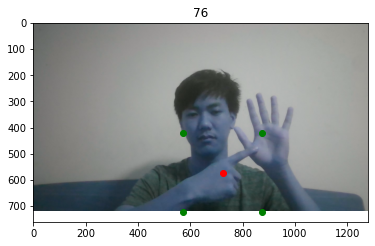

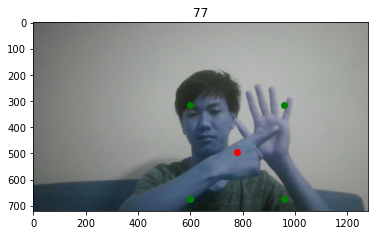

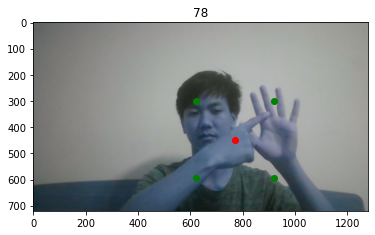

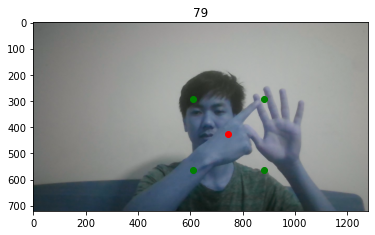

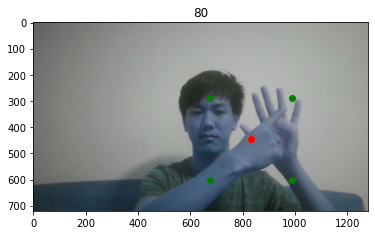

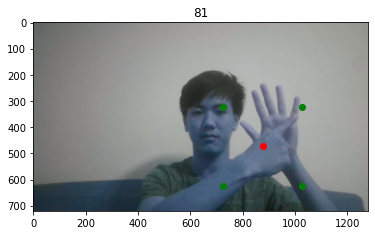

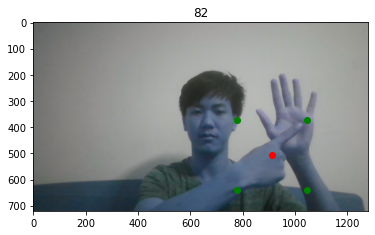

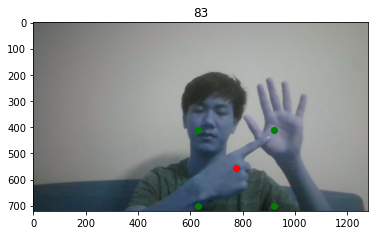

blank
blank
blank
blank
blank
blank
blank
blank
blank
blank
blank


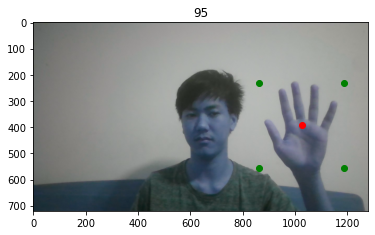

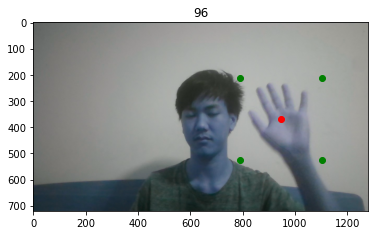

blank
blank
blank


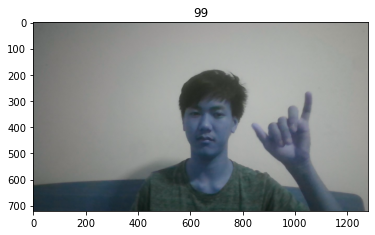

In [20]:
import cv2
for i in range(100):
   
    namei = str(i).zfill(5)
    img = cv2.imread('../data011/imgi/'+namei+'.jpg')/255

    width = img.shape[1]
    height = img.shape[0]
    #test = np.load('../../gen_yolo/save/peaks_'+str(namei)+'.jpg.npy')
    test = np.load('../data011/peak/peaks_'+str(namei)+'.jpg.npy')
    plt.title(i)
    plt.imshow(img)
    if test[0] == 'blank':
        print('blank')
        continue
    for peak in test:
        x = peak[0]*width *640/768
        y = peak[1]*height *360/432
        w = peak[2]*width *640/768
        h = peak[3]*height *360/432
        c = peak[4]
        c1 = peak[5]
        c2 = peak[6]
        x1 = x - w/2
        x2 = x + w/2
        y1 = y - w/2
        y2 = y + w/2
    plt.plot(x,y,'ro')
    plt.plot(x1,y1,'go')
    plt.plot(x1,y2,'go')
    plt.plot(x2,y1,'go')
    plt.plot(x2,y2,'go')
    plt.title(i)
    plt.show()

In [21]:
a = 'peaks_00001.jpg.npy'
a[6:11]

'00001'

In [40]:
1/(640/768) 1/a  x*a = x/1/a

1.2

In [41]:
1/(360/432)

1.2

C:\Users\Walter\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


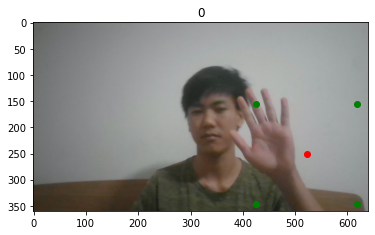

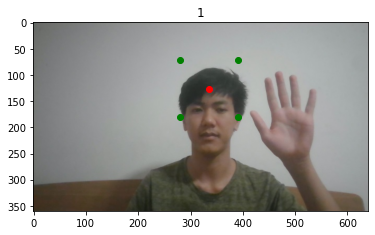

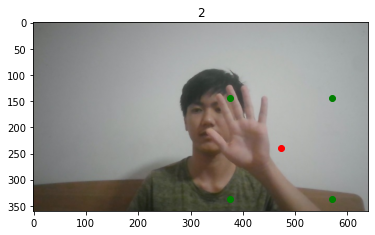

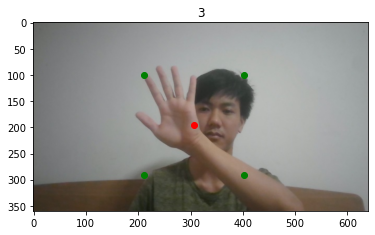

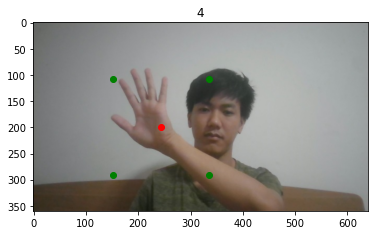

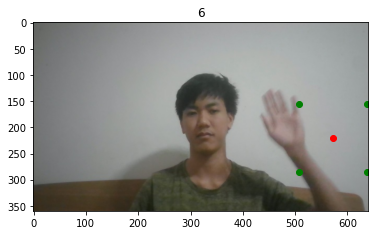

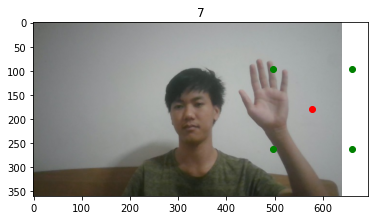

In [58]:
#check ground truth
import numpy as np
for i in range(10):
    namei = str(i).zfill(5)
    img = torch.load('../data011/imgi640_torch/'+namei)/255
    
    if test[0] == 'blank':continue
    for peak in test:
        x = peak[0]*width
        y = peak[1]*height
        w = peak[2]*width
        h = peak[3]*height
        c = peak[4]
        c1 = peak[5]
        c2 = peak[6]
        x1 = x - w/2
        x2 = x + w/2
        y1 = y - w/2
        y2 = y + w/2
    plt.imshow(img[(2,1,0),:,:].transpose(2,0))
    plt.plot(x,y,'ro')
    plt.plot(x1,y1,'go')
    plt.plot(x1,y2,'go')
    plt.plot(x2,y1,'go')
    plt.plot(x2,y2,'go')
    plt.title(i)
    plt.show()

640 360


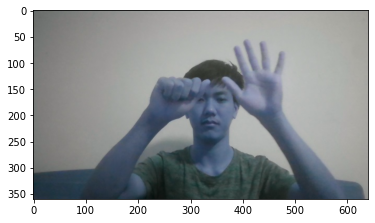

In [53]:
img = torch.load('img00024')
plt.imshow(img.transpose(2,0))
img.shape
width = img.shape[1]
height = img.shape[2]
print(width, height)

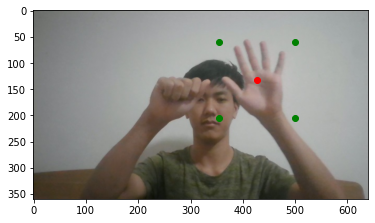

In [54]:
gt = torch.load('gt00024')
x,y,w,h =0.6673, 0.3692, 0.2279, 0.4560
x *= width
y *= height
w *= width
h *= height
x1 = x - w/2
x2 = x + w/2
y1 = y - w/2
y2 = y + w/2
plt.imshow(img[(2,1,0),:,:].transpose(2,0))
plt.plot(x,y,'ro')
plt.plot(x1,y1,'go')
plt.plot(x1,y2,'go')
plt.plot(x2,y1,'go')
plt.plot(x2,y2,'go')
plt.show()

In [52]:
gt

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0

# cam

C:\Users\Walter\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:2506: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
C:\Users\Walter\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


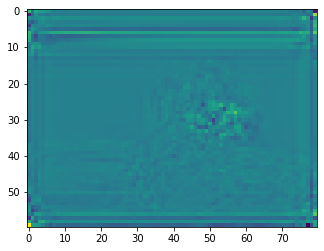

In [12]:
#original size
import cv2
from torch.nn import functional as f
cap = cv2.VideoCapture(0)

# get original shape
_,frame = cap.read()
width  = frame.shape[1]
height = frame.shape[0]

# prepare for heatmap
heatshape = (11, width, height)
map_left  = torch.zeros(heatshape).cuda()
map_right = torch.zeros(heatshape).cuda()
map_up    = torch.zeros(heatshape).cuda()
map_down  = torch.zeros(heatshape).cuda()

while True:
    _,frame = cap.read()
    #cv2.imshow('input',frame)
    inputt = torch.cuda.FloatTensor(frame).transpose(0,2)/255
    width = 640
    height = 480
    inputt = f.interpolate(inputt.unsqueeze(0), (width, height), mode='bicubic')
    #inputt = inputt.unsqueeze(0)
    with torch.no_grad():
        output = model(inputt)
    
    all_peaks = allpeaks(output[11], width, height)
    connect = bigram(output[5], all_peaks)
    
    for x1, y1, x2, y2, link in connect:
        start_point = (x1, y1)
        end_point   = (x2, y2)
        cv2.line(frame, start_point, end_point, (255,0,0), 2)
        if link == 6:
            cv2.line(frame, start_point, end_point, (0,255,255), 3)
        
    for i, peaks in enumerate(all_peaks):
        for peak in peaks:
            org = (peak[0].cpu(),peak[1].cpu())
            
            if i ==3:
                cv2.circle(frame, org, 7, (255,155,100), -1)
            elif i ==4:
                cv2.circle(frame, org, 7, (255,0,0), -1)
            else:
                cv2.circle(frame, org, 4, (0,255,255), -1)
            cv2.putText(frame, str(i), org, cv2.FONT_HERSHEY_SIMPLEX
                        ,0.6, (0,255,0), 1, cv2.LINE_AA)
   
            
    #frame = cv2.resize(frame, (640, 480), interpolation = cv2.INTER_AREA)
    cv2.imshow('result',frame)
    
    plt.imshow(output[11][0].max(0)[0].cpu().transpose(1,0))
    plt.savefig('temp_for_ck.png')
    peaks = cv2.imread('temp_for_ck.png')
    cv2.imshow('peak',peaks)
    
    plt.imshow(output[5][0].mean(0).cpu().transpose(1,0))
    plt.savefig('temp_for_ck_l.png')
    links = cv2.imread('temp_for_ck_l.png')
    cv2.imshow('link',links)
    
    key = cv2.waitKey(2000)
    if key == ord('a'):
        break
cap.release()
cv2.destroyAllWindows()